In [112]:
import pandas as pd
from langdetect import detect




In [113]:
def is_english(text):
    try:
        language = detect(text)
        return language == 'en'
    except:
        # Handle cases where language detection fails
        return False

In [114]:
df=pd.read_json("test3.json",lines=True)

sentences=df["sentences"].tolist()
Labels=df["labels"].tolist()
df.dtypes

sentences    object
labels       object
dtype: object

In [115]:
data = []
for s in sentences:
    data.extend(s)

print(len(data))
labels = []
for l in Labels:
    labels.extend(l)

print(len(set(labels)))
sentences=data

420464
50


In [116]:
from collections import Counter
counter = Counter(labels)
most_common_items = counter.most_common(15)

print("15 most frequent items:")
for item, count in most_common_items:
    print(f"{item}: {count} occurrences")

15 most frequent items:
collapse.txt: 12297 occurrences
comicbooks.txt: 11251 occurrences
classicalmusic.txt: 11131 occurrences
Coffee.txt: 10680 occurrences
aviation.txt: 10393 occurrences
Animals.txt: 10287 occurrences
canada.txt: 10176 occurrences
amazon.txt: 10100 occurrences
Austin.txt: 9776 occurrences
advertising.txt: 9761 occurrences
bicycling.txt: 9414 occurrences
apple.txt: 9336 occurrences
Art.txt: 9279 occurrences
Buddhism.txt: 9219 occurrences
Anarchism.txt: 9218 occurrences


In [117]:
# Combine sentences and labels into a list of (sentence, label) tuples
data = list(zip(sentences, labels))

# Specify a list of label names you want to select
selected_labels = ['advertising.txt','canada.txt']  # Add your desired label names

# Define the number of sentences to keep for each selected label
n = 500  # Adjust this value as needed

# Initialize lists to store selected data
selected_data = []
selected_lable = []

# Keep only n sentences for each selected label
for label in selected_labels:
    filtered_data = [(sentence, l) for sentence, l in data if (l == label and is_english(sentence)) ]
    for i in range(n):
        selected_data.append(filtered_data[i][0])
    selected_lable.extend([label] * min(n, len(filtered_data)))




In [118]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD
import spacy
import pandas as pd
nlp = spacy.load("en_core_web_sm")
# warnings imports
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans, MiniBatchKMeans
import numpy as np
from matplotlib.patches import Ellipse
import pandas as pd

In [119]:
true_k = len(selected_labels)
data=selected_data

vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, stop_words='english',
use_idf=True)
X = vectorizer.fit_transform(data)
X0=X
print("n_samples: %d, n_features: %d" % X.shape)

#Dimensionality Reduction
# Vectorizer results are normalized, which makes KMeans behave better
    # Since LSA/SVD results are not normalized, we have to redo the normalization.

    #If we do not normalize the data, variables with different scaling 
    # will be weighted differently in the distance formula 
    # that is being optimized during training.
n_components = 5
svd = TruncatedSVD(n_components)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
#The final X is the input which we will be using. 
# It has been cleaned, TF-IDF transformed, and its dimensions reduced.
X = lsa.fit_transform(X)

n_samples: 1000, n_features: 3329


c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1

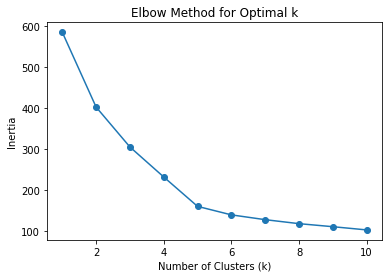

In [120]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_values = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [121]:

#scikit-learn offers two implementations of kmeans:
# either in mini-batches or without
minibatch = True
if minibatch:
   km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', n_init=1,
   init_size=1000, batch_size=1000)
else:
   km = KMeans(n_clusters=true_k, init='k-means++', max_iter=10000, n_init=1)
km.fit(X)
# top words per cluster
print("Clustering sparse data with %s" % km)

original_space_centroids = svd.inverse_transform(km.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
   print("Cluster %d:" % i)
   for ind in order_centroids[i, :10]:
      print(' %s' % terms[ind])

#Note: You might see different results, as machine learning 
# algorithms do not produce the exact same results each time.
#km.predict(X_test) to test our model

#imports the KMeans algorithm from the scikit-learn library and 
# creates an instance of it with three clusters, a random state of 0, 
# and automatic initialization
#KMeans algorithm is a clustering algorithm that groups 
# similar data points together based on their distance from each other
kmeans = KMeans(n_clusters = true_k, random_state = 0, n_init='auto',max_iter=30000)
#The fit method is then called on the normalized training data 
# to train the KMeans model on the data.
kmeans.fit(X)
print("Second method:")
original_space_centroids = svd.inverse_transform(kmeans.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
   print("Cluster %d:" % i)
   for ind in order_centroids[i, :10]:
      print(' %s' % terms[ind])



Clustering sparse data with MiniBatchKMeans(batch_size=1000, init_size=1000, n_clusters=2, n_init=1)
Cluster 0:
 ad
 advertising
 india
 delhi
 agency
 canada
 new
 best
 company
 ads
Cluster 1:
 canada
 trudeau
 ads
 online
 canadian
 justin
 new
 free
 dollar
 need
Second method:
Cluster 0:
 canada
 trudeau
 canadian
 new
 justin
 dollar
 need
 health
 thing
 legalization
Cluster 1:
 advertising
 ad
 ads
 online
 free
 canada
 india
 business
 agency
 display


In [122]:
import numpy as np

def convert_labels_to_integers(labels):
    unique_labels, integer_labels = np.unique(labels, return_inverse=True)
    return integer_labels, dict(zip(unique_labels, range(len(unique_labels))))

integer_labels, label_mapping = convert_labels_to_integers(selected_lable)


In [123]:

print("Homogeneity: %0.3f" % metrics.homogeneity_score(integer_labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(integer_labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(integer_labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(integer_labels, km.labels_))
print("Silhouette Coefficient: %0.3f "
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

Homogeneity: 0.298
Completeness: 0.308
V-measure: 0.303
Adjusted Rand-Index: 0.359
Silhouette Coefficient: 0.301 


In [124]:

print("Homogeneity: %0.3f" % metrics.homogeneity_score(integer_labels, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(integer_labels, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(integer_labels, kmeans.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(integer_labels, kmeans.labels_))
print("Silhouette Coefficient: %0.3f "
      % metrics.silhouette_score(X, kmeans.labels_, sample_size=1000))

Homogeneity: 0.390
Completeness: 0.390
V-measure: 0.390
Adjusted Rand-Index: 0.489
Silhouette Coefficient: 0.342 


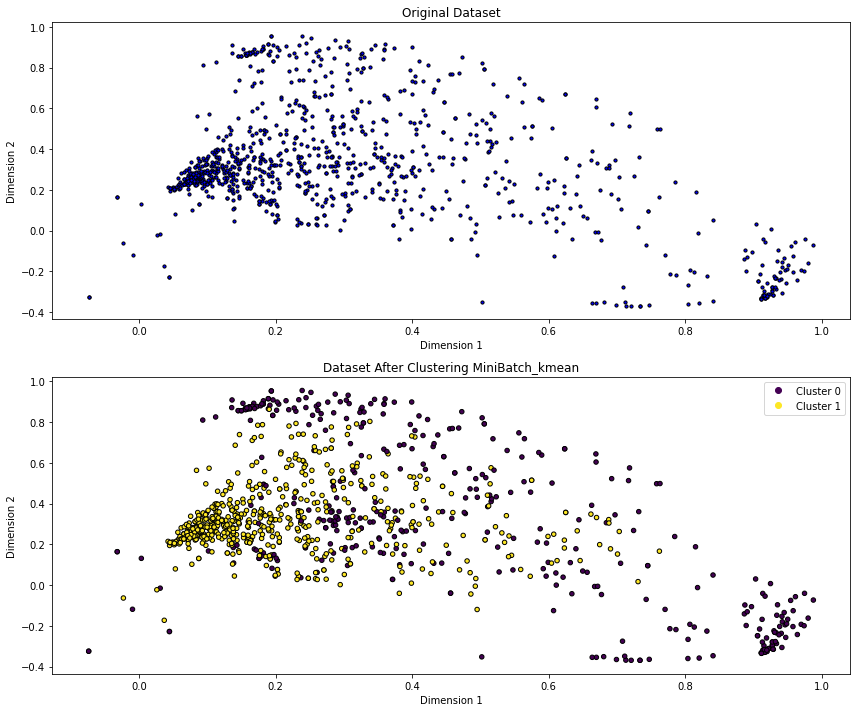

In [125]:
# ... (Your previous code for training KMeans)

# Visualize the dataset after clustering
cluster_assignments = km.predict(X)
cluster_centers = km.cluster_centers_

# Visualize the original dataset
fig, axs = plt.subplots(2, 1, figsize=(12, 10))  # Change to 2 rows and 1 column

axs[0].scatter(X[:, 0], X[:, 1], c='blue', marker='o', edgecolors='k', s=10)  # Adjust the marker size (s) as needed
axs[0].set_title('Original Dataset')
axs[0].set_xlabel('Dimension 1')
axs[0].set_ylabel('Dimension 2')

# Visualize the dataset after clustering
scatter = axs[1].scatter(X[:, 0], X[:, 1], c=cluster_assignments, cmap='viridis', marker='o', edgecolors='k', s=20)  # Adjust the marker size (s) as needed



axs[1].set_title('Dataset After Clustering MiniBatch_kmean')
axs[1].set_xlabel('Dimension 1')
axs[1].set_ylabel('Dimension 2')

# Add a legend for cluster assignments
legend_labels = [f'Cluster {i}' for i in range(true_k)]  # Adjust the range according to your number of clusters
axs[1].legend(handles=scatter.legend_elements()[0], labels=legend_labels, loc='upper right')

plt.tight_layout()
plt.show()

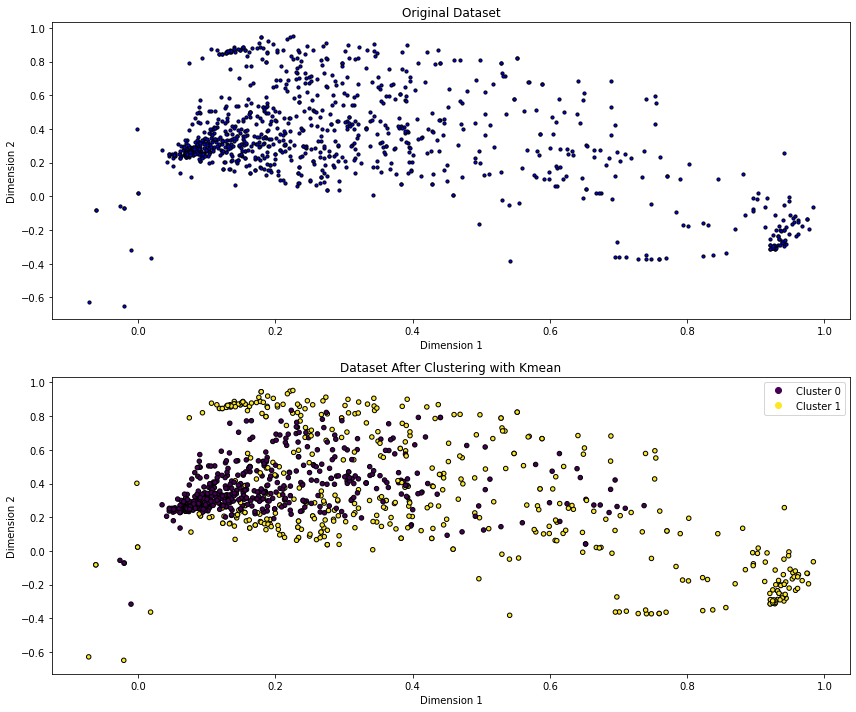

In [ ]:
# ... (Your previous code for training KMeans)

# Visualize the dataset after clustering
cluster_assignments = kmeans.predict(X)
cluster_centers = kmeans.cluster_centers_

# Visualize the original dataset
fig, axs = plt.subplots(2, 1, figsize=(12, 10))  # Change to 2 rows and 1 column

axs[0].scatter(X[:, 0], X[:, 1], c='blue', marker='o', edgecolors='k', s=10)  # Adjust the marker size (s) as needed
axs[0].set_title('Original Dataset')
axs[0].set_xlabel('Dimension 1')
axs[0].set_ylabel('Dimension 2')

# Visualize the dataset after clustering
scatter = axs[1].scatter(X[:, 0], X[:, 1], c=cluster_assignments, cmap='viridis', marker='o', edgecolors='k', s=20)  # Adjust the marker size (s) as needed



axs[1].set_title('Dataset After Clustering with Kmean')
axs[1].set_xlabel('Dimension 1')
axs[1].set_ylabel('Dimension 2')

# Add a legend for cluster assignments
legend_labels = [f'Cluster {i}' for i in range(true_k)]  # Adjust the range according to your number of clusters
axs[1].legend(handles=scatter.legend_elements()[0], labels=legend_labels, loc='upper right')

plt.tight_layout()
plt.show()

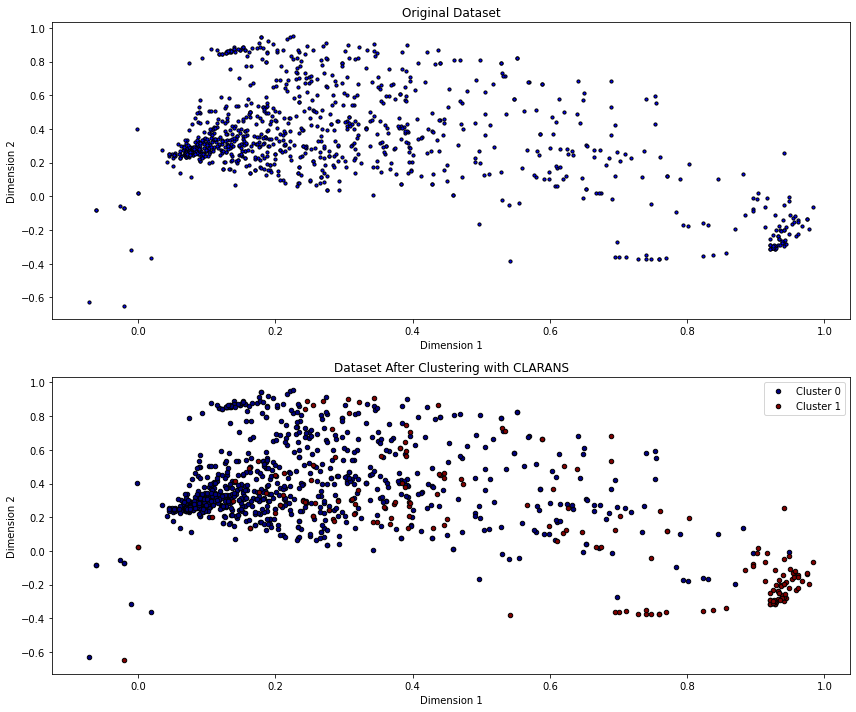

In [ ]:
from pyclustering.cluster.clarans import clarans
from pyclustering.utils import read_sample
import matplotlib.pyplot as plt
import numpy as np

# Assuming X is your dataset

# Convert the dataset to the required format


# Initialize CLARANS model
clarans_instance = clarans(X, true_k, 2,2)

# Run CLARANS clustering algorithm
clarans_instance.process()

# Get cluster assignments
cluster_assignments = clarans_instance.get_clusters()

# Visualize the original dataset
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

axs[0].scatter(X[:, 0], X[:, 1], c='blue', marker='o', edgecolors='k', s=10)
axs[0].set_title('Original Dataset')
axs[0].set_xlabel('Dimension 1')
axs[0].set_ylabel('Dimension 2')

# Visualize the dataset after clustering
colors = plt.cm.jet(np.linspace(0, 1, len(cluster_assignments)))
for i, cluster_points in enumerate(cluster_assignments):
    cluster_points = np.array(cluster_points)
    axs[1].scatter(X[cluster_points, 0], X[cluster_points, 1], c=[colors[i]], label=f'Cluster {i}', marker='o', edgecolors='k', s=20)

axs[1].set_title('Dataset After Clustering with CLARANS')
axs[1].set_xlabel('Dimension 1')
axs[1].set_ylabel('Dimension 2')
axs[1].legend(loc='upper right')

plt.tight_layout()
plt.show()


In [ ]:
def extract_labels_from_clusters(clusters):
    labels = [-1] * sum(map(len, clusters))  # Initialize with -1, which can be used as a placeholder for unassigned points
    for cluster_label, cluster_indices in enumerate(clusters):
        for data_point_index in cluster_indices:
            labels[data_point_index] = cluster_label
    return labels

# Example clusters (list of lists)
clusters = [[0, 1, 2], [3, 4], [5, 6, 7]]

# Extract labels from clusters
cluster_labels = extract_labels_from_clusters(clusters)




In [ ]:
clarans_labels=extract_labels_from_clusters(cluster_assignments)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(integer_labels,clarans_labels))
print("Completeness: %0.3f" % metrics.completeness_score(integer_labels,clarans_labels))
print("V-measure: %0.3f" % metrics.v_measure_score(integer_labels, clarans_labels))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(integer_labels, clarans_labels))
print("Silhouette Coefficient: %0.3f "
      % metrics.silhouette_score(X,clarans_labels, sample_size=1000))

Homogeneity: 0.113
Completeness: 0.164
V-measure: 0.134
Adjusted Rand-Index: 0.082
Silhouette Coefficient: 0.313 


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

# Assuming you have data X and integer_labels
dbscan = DBSCAN(eps=0.1, min_samples=5)
db_labels = dbscan.fit_predict(X)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(integer_labels, db_labels))
print("Completeness: %0.3f" % metrics.completeness_score(integer_labels, db_labels))
print("V-measure: %0.3f" % metrics.v_measure_score(integer_labels, db_labels))
# Adjusted Rand Index may not be applicable for DBSCAN

# Check if there is more than one cluster (excluding noise points)
unique_labels = np.unique(db_labels)
if len(unique_labels) > 1:
    print("Silhouette Coefficient: %0.3f "
          % metrics.silhouette_score(X, db_labels, sample_size=1000))
else:
    print("Silhouette Coefficient cannot be calculated with only one cluster.")

Homogeneity: 0.364
Completeness: 0.187
V-measure: 0.247
Silhouette Coefficient: -0.097 


In [127]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

# Assuming you have data X and integer_labels
hierarchical = AgglomerativeClustering(n_clusters=4)
hierarchical_labels = hierarchical.fit_predict(X)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(integer_labels, hierarchical_labels))
print("Completeness: %0.3f" % metrics.completeness_score(integer_labels, hierarchical_labels))
print("V-measure: %0.3f" % metrics.v_measure_score(integer_labels, hierarchical_labels))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(integer_labels, hierarchical_labels))
# Silhouette Coefficient can be calculated, but sample_size may need adjustment
print("Silhouette Coefficient: %0.3f "
      % metrics.silhouette_score(X, hierarchical_labels, sample_size=1000))


Homogeneity: 0.383
Completeness: 0.208
V-measure: 0.270
Adjusted Rand-Index: 0.313
Silhouette Coefficient: 0.391 


In [128]:
from sklearn.cluster import SpectralClustering
from sklearn import metrics

# Assuming you have data X and integer_labels
spectral = SpectralClustering(n_clusters=4, affinity='rbf')
spectral_labels = spectral.fit_predict(X)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(integer_labels, spectral_labels))
print("Completeness: %0.3f" % metrics.completeness_score(integer_labels, spectral_labels))
print("V-measure: %0.3f" % metrics.v_measure_score(integer_labels, spectral_labels))
# Adjusted Rand Index may not be applicable for Spectral Clustering

# Silhouette Coefficient can be calculated, but sample_size may need adjustment
print("Silhouette Coefficient: %0.3f "
      % metrics.silhouette_score(X, spectral_labels, sample_size=1000))

Homogeneity: 0.393
Completeness: 0.225
V-measure: 0.286
Silhouette Coefficient: 0.438 
